#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.add(Dropout(rate=0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型 categorical_crossentropy

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 作業:
# 請分別選用 "MSE", "binary _crossentropy"
# 查看Train/test accurancy and loss rate

In [23]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Instructions for updating:
Use tf.cast instead.
Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 11s 294us/step - loss: 2.1651 - acc: 0.1985 - val_loss: 2.0517 - val_acc: 0.2957
Epoch 2/12
37500/37500 [==============================] - 8s 207us/step - loss: 1.9549 - acc: 0.2955 - val_loss: 1.9353 - val_acc: 0.3462
Epoch 3/12
37500/37500 [==============================] - 8s 207us/step - loss: 1.8340 - acc: 0.3470 - val_loss: 1.8415 - val_acc: 0.3827
Epoch 4/12
37500/37500 [==============================] - 8s 207us/step - loss: 1.7304 - acc: 0.3818 - val_loss: 1.7483 - val_acc: 0.4178
Epoch 5/12
37500/37500 [==============================] - 8s 205us/step - loss: 1.6496 - acc: 0.4095 - val_loss: 1.6801 - val_acc: 0.4402
Epoch 6/12
37500/37500 [==============================] - 8s 206us/step - loss: 1.5857 - acc: 0.4317 - val_loss: 1.6517 - val_acc: 0.4500
Epoch 7/12
37500/37500 [==============================] - 8s 206us/step -

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

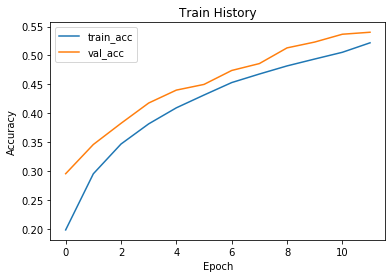

In [25]:
show_train_history('acc','val_acc')

# 載入之前訓練的模型

In [26]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型 MSE

In [27]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

# 作業:
# 請分別選用 "MSE", "binary _crossentropy"
# 查看Train/test accurancy and loss rate

In [28]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 8s 217us/step - loss: 0.0606 - acc: 0.5313 - val_loss: 0.0629 - val_acc: 0.5494
Epoch 2/12
37500/37500 [==============================] - 8s 207us/step - loss: 0.0604 - acc: 0.5334 - val_loss: 0.0628 - val_acc: 0.5521
Epoch 3/12
37500/37500 [==============================] - 8s 207us/step - loss: 0.0604 - acc: 0.5324 - val_loss: 0.0627 - val_acc: 0.5518
Epoch 4/12
37500/37500 [==============================] - 8s 206us/step - loss: 0.0602 - acc: 0.5371 - val_loss: 0.0627 - val_acc: 0.5494
Epoch 5/12
37500/37500 [==============================] - 8s 207us/step - loss: 0.0601 - acc: 0.5345 - val_loss: 0.0625 - val_acc: 0.5534
Epoch 6/12
37500/37500 [==============================] - 8s 206us/step - loss: 0.0602 - acc: 0.5342 - val_loss: 0.0624 - val_acc: 0.5538
Epoch 7/12
37500/37500 [==============================] - 8s 207us/step - loss: 0.0602 - acc: 0.5364 - val_loss: 0.0624 - 

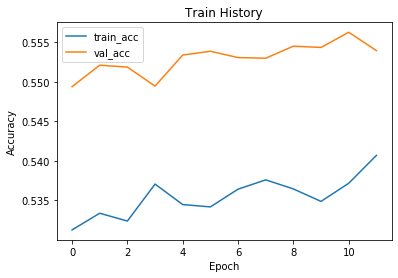

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
    
show_train_history('acc','val_acc')

# 載入之前訓練的模型

In [30]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型 binary _crossentropy

In [31]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

# 作業:
# 請分別選用 "MSE", "binary _crossentropy"
# 查看Train/test accurancy and loss rate

#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 8s 220us/step - loss: 0.0597 - acc: 0.5388 - val_loss: 0.0620 - val_acc: 0.5574
Epoch 2/12
37500/37500 [==============================] - 8s 208us/step - loss: 0.0596 - acc: 0.5397 - val_loss: 0.0620 - val_acc: 0.5554
Epoch 3/12
37500/37500 [==============================] - 8s 206us/step - loss: 0.0594 - acc: 0.5414 - val_loss: 0.0619 - val_acc: 0.5566
Epoch 4/12
37500/37500 [==============================] - 8s 206us/step - loss: 0.0598 - acc: 0.5363 - val_loss: 0.0619 - val_acc: 0.5573
Epoch 5/12
37500/37500 [==============================] - 8s 206us/step - loss: 0.0594 - acc: 0.5415 - val_loss: 0.0618 - val_acc: 0.5588
Epoch 6/12
37500/37500 [==============================] - 8s 210us/step - loss: 0.0595 - acc: 0.5401 - val_loss: 0.0618 - val_acc: 0.5581
Epoch 7/12
37500/37500 [==============================] - 8s 207us/step - loss: 0.0593 - acc: 0.5437 - val_loss: 0.0617 - 

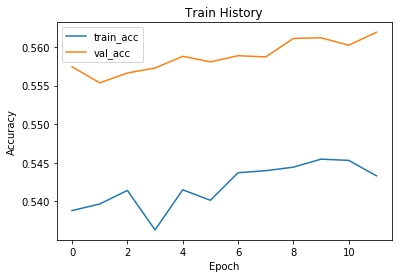

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
    
show_train_history('acc','val_acc')